In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('C:\\Users\\user\\Desktop\\2) Stock Prices Data Set.csv')

In [62]:
df.head() #preview of the dataset we want to work build a linear regression model on

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [63]:
df.isnull().sum() #this shows the empty 'dataset in each columns

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [64]:
df_filled = df.fillna(df.median(numeric_only=True))


In [65]:
df_filled.isnull().sum() #we have successfully filled our blank cells

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [66]:
#successfully exported the cleaned csv on our machine
df_filled.to_csv("stockpricesintern.csv", index=False)


In [67]:
df=pd.read_csv('C:\\Users\\user\\stockpricesintern.csv')

In [68]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [69]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder

new_col=df.select_dtypes(include=['object']).columns
le=LabelEncoder()
for col in new_col:
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [71]:
df.head()

,symbol,date,open,high,low,close,volume
0,1,0,25.0700,25.8200,25.0600,25.3600,8998943
1,3,0,79.3828,79.5756,78.8601,79.0185,58791957
2,2,0,110.3600,111.8800,109.2900,109.7400,542711
3,4,0,52.1200,52.3300,51.5200,51.9800,4569061
4,5,0,70.1100,70.2300,69.4800,69.8900,1148391


In [72]:
#we want to sort the stock by date so that it will predict next day outcome

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by=["symbol", "date"])

In [73]:
#shift target by one day
df["next_day_close"] = df.groupby("symbol")["close"].shift(-1)

In [74]:
df = df.dropna(subset=["next_day_close"])

In [75]:
X = df[["open", "high", "low", "close", "volume"]] #features
y = df["next_day_close"] #target

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse, "R²:", r2)


RMSE: 1.3655828996140844 R²: 0.9991481785657609


In [78]:
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Accuracy in %
accuracy = 100 - mape

print(f"Model Accuracy: {accuracy:.2f}%")
print(f"MAPE: {mape:.2f}%")


Model Accuracy: 98.96%
MAPE: 1.04%


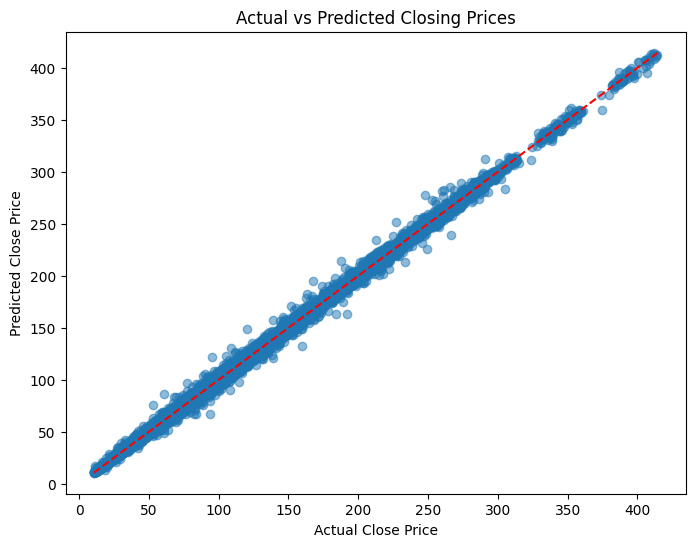

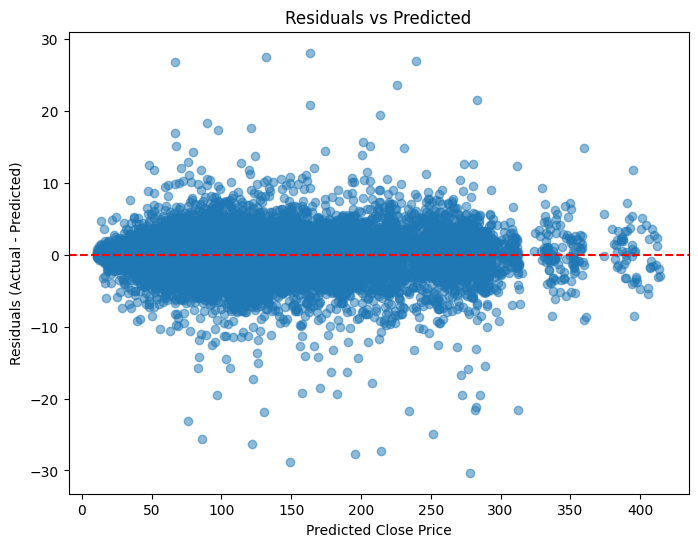

In [79]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Closing Prices")
plt.show()

# --- Plot 2: Residuals (errors) ---
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Close Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()


In [80]:
import pickle
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)